<a href="https://colab.research.google.com/github/ElenaLuchnikova/Analyzes/blob/main/ABC_analysis_StroyRec_1q_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [169]:
import pandas as pd
import numpy as np
from pathlib import Path
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt


src_file=Path.cwd()  /'/content/drive/MyDrive/ун отчет покупки март 2015.xls'

In [170]:
#df=pd.read_excel('/content/drive/MyDrive/ун отчет покупки март 2015.xls')
df=pd.read_excel(src_file, header=0, usecols='A:L')

In [171]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [172]:
pd.set_option('display.float_format', '{:.2f}'.format)
#изменяем научный вид числа на дробное число с 2мя знаками после запятой

In [173]:
df.head()

,"Реализация (акт, накладная)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Номенклатура,Единица,% НДС,Коэффициент,Количество,Цена,Сумма,НДС
0,"Реализация (акт, накладная) 00000000279 от 27....",NaN,NaN,NaN,Песок строительный,м3,18%,1,56.47,343.22,19381.65,3488.70
1,"Реализация (акт, накладная) 00000000281 от 05....",NaN,NaN,NaN,Кассета КПФ - 190 (4м),шт,18%,1,1.00,80508.47,80508.47,14491.53
2,"Реализация (акт, накладная) 00000000284 от 16....",NaN,NaN,NaN,Машина деревообрабатывающая 2500Е,шт,18%,1,1.00,22500.00,22500.00,4050.00
3,"Реализация (акт, накладная) 00000000290 от 15....",NaN,NaN,NaN,Кабель КПКВнг 2х2х0.5,шт,18%,1,70.00,31.36,2194.92,395.08
4,"Реализация (акт, накладная) 00000000292 от 13....",NaN,NaN,NaN,Аппарат высокого давления без нагрева HD 6/15 ...,шт,Без НДС,1,1.00,58520.00,58520.00,NaN


In [174]:
new_cols=['Реализация (акт, накладная)', 'Номенклатура', 'Количество','Цена', 'Сумма']
df=df[new_cols]
df.columns=['date', 'nom', 'kol', 'price', 'sum']

In [175]:
#Вытащим из строки дату и преобразуем всю строку в формат даты
df['date']=df['date'].str.split('от', n=1).str[1]
df['date']

<ipython-input-175-b0b43da106e6>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date
0,27.03.2015 12:00:07
1,05.03.2015 14:38:39
2,16.03.2015 12:00:05
3,15.02.2015 12:00:00
4,13.03.2015 13:50:40
...,...
537,27.03.2015 12:00:03
538,28.03.2015 12:00:00
539,25.03.2015 12:10:23
540,25.03.2015 12:10:23


In [176]:
df['date']=pd.to_datetime(df['date'])

df['date'] = df['date'].dt.floor('d')
df['date']

<ipython-input-176-c7b3a3e2f35f>:1: UserWarning:

Parsing dates in  %d.%m.%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.

<ipython-input-176-c7b3a3e2f35f>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-176-c7b3a3e2f35f>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date
0,2015-03-27
1,2015-03-05
2,2015-03-16
3,2015-02-15
4,2015-03-13
...,...
537,2015-03-27
538,2015-03-28
539,2015-03-25
540,2015-03-25


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542 entries, 0 to 541
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    542 non-null    datetime64[ns]
 1   nom     542 non-null    object        
 2   kol     542 non-null    float64       
 3   price   542 non-null    float64       
 4   sum     542 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 21.3+ KB


In [178]:
#Cоздаем отдельный столбец с месяцем
df['month']=pd.to_datetime(df.date).dt.month
df['month']

<ipython-input-178-5a9d482c7632>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,month
0,3
1,3
2,3
3,2
4,3
...,...
537,3
538,3
539,3
540,3


**EDA**

In [179]:
df[df.isna().values.any(axis=1)]

,date,nom,kol,price,sum,month


In [180]:
df.shape

(542, 6)

In [181]:

df.dropna().shape


(542, 6)

In [182]:
df.describe()

,date,kol,price,sum,month
count,542,542.00,542.00,542.00,542.00
mean,2015-02-21 03:32:32.767527680,313.12,2428.90,14814.13,2.21
min,2015-01-11 00:00:00,0.05,0.14,13.74,1.00
25%,2015-02-03 00:00:00,2.00,57.76,712.28,2.00
50%,2015-02-17 00:00:00,6.00,259.15,2432.02,2.00
75%,2015-03-12 00:00:00,30.00,1448.43,7624.88,3.00
max,2015-03-31 00:00:00,24000.00,80508.47,590960.00,3.00
std,NaN,1670.41,7648.84,49908.60,0.75


In [183]:
df['nom'].value_counts()


,count
nom,
"Аккумуляторная дрель-шуруповерт Nocord, 12В, 2х1.5 А·ч Li-Ion, в кейсе",28
"Дрель-шуруповерт аккумуляторная Makita DDF453RFE, 18 В Li-ion 2x3 Ач",8
Фонарь строит.,8
Бетон товарный В25 (м350),7
Дрель ELITECH ударная ДУ 650РЭК 650Вт,5
...,...
Бур 06х160х100мм,1
Бур 10*210,1
"Бур 14,0х200мм",1


In [184]:
df['nom'].value_counts(normalize=True)

,proportion
nom,
"Аккумуляторная дрель-шуруповерт Nocord, 12В, 2х1.5 А·ч Li-Ion, в кейсе",0.05
"Дрель-шуруповерт аккумуляторная Makita DDF453RFE, 18 В Li-ion 2x3 Ач",0.01
Фонарь строит.,0.01
Бетон товарный В25 (м350),0.01
Дрель ELITECH ударная ДУ 650РЭК 650Вт,0.01
...,...
Бур 06х160х100мм,0.00
Бур 10*210,0.00
"Бур 14,0х200мм",0.00


Лидер продаж в абсолютных и относительных значениях - Аккумуляторная дрель-шуруповерт Nocord, 12В, 2х1.5 А·ч Li-Ion, в кейсе

In [185]:
plt.rcParams['figure.figsize']=(16,6)

In [186]:
#Посмотрим на распределение продаж товаров
fig=px.histogram(df, x='nom')
fig.show()

Лидирует Аккумуляторная дрель-шуруповерт Nocord, 12В, 2х1.5 А·ч Li-Ion, в кейсе, продали 28 раз


In [187]:
#Разобьем суммы продаж по группам и посмотрим их распределение
fig=px.histogram(df, x='sum', nbins=100)
fig.show()

Большинство продаж было совершено на сумму до 5000 р. (361 продажа)

In [188]:
#Посмотрим взяимосвязь между датой продаж и суммой продаж
fig=px.bar(df, x = "date", y = "sum")
fig.show()

Пики продаж - 19 января, 12 и 26 марта

In [189]:
#fig = px.line(df, x = 'date', y = 'sum', title = 'Динамика продаж')
#fig.show()

In [190]:
#Посмотрим взяимосвязь между месяцем продаж и суммой продаж
fig=px.bar(df, x='month', y='sum')
fig.show()

Максимум продаж (в разрезе суммы продаж) был в марте

In [191]:
#Посмотрим взяимосвязь между месяцем продаж и количеством проданных товаров
fig=px.bar(df, x='month', y='kol')
fig.show()

Наибольшее кол-во продаж - в феврале

In [192]:
fig = px.box(df , y = "kol")
fig.show( )

Количество продаж:


*   Минимум - 0.05
*   1 квартиль - 2
*   Медиана  - 6
*   3 квартиль - 30
*   Максимальный выброс - 24000
  









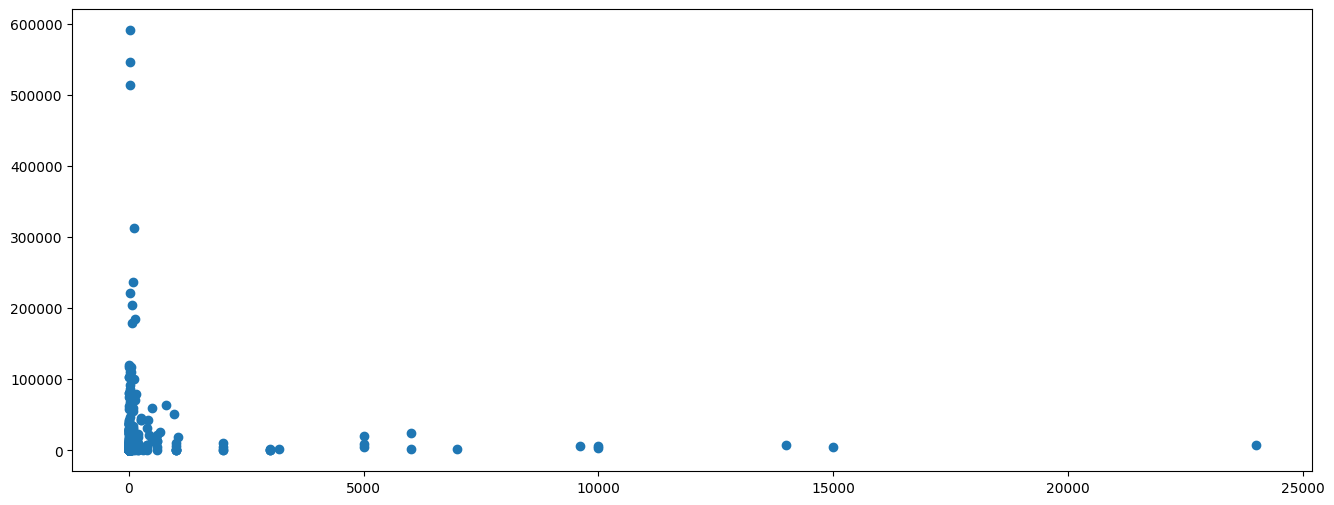

In [193]:
#Посмотрим связь между кол-вом и суммой продаж
plt.scatter(df['kol'], df['sum'])

Наблюдаем отрицательную корреляцию между кол-вом продаж и суммой - чем ниже цена, тем больше количество проданных единиц

<Axes: >

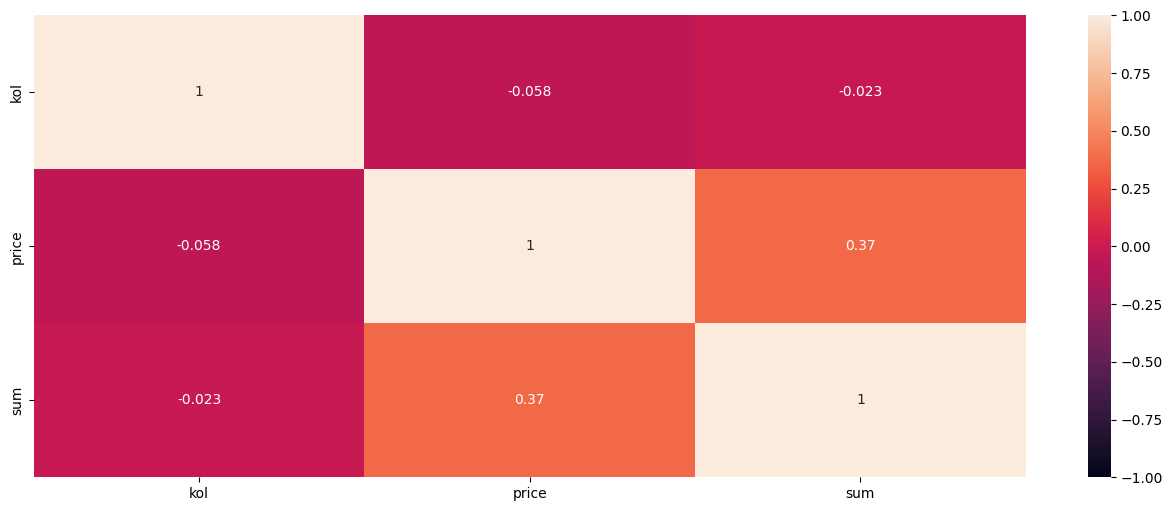

In [194]:
#Посмотрим на корреляцию между количеством, ценой и суммой продажи в числовом выражении
df_corr=df.drop(['date', 'nom', 'month'], axis=1)

sns.heatmap(df_corr.corr(), vmax=1, vmin=-1, annot=True)

Есть небольшая положительная корреляция между суммой и ценой (0.37). Между количеством продаж и суммой,  а также между количеством и ценой  - незначительная отрицательная корреляция (-0.023 и -0.058 соответственно)

## **ABC-анализ** (по количеству и по выручке)
**Группа А** — самые ценные позиции,  обеспечивают 80% выручки/кол-ва продаж.
**Группа В** — нейтральные позиции,  приносят 15% выручки/кол-ва продаж.
**Группа С** — наименее ценные,  дают 5% выручки/кол-ва продаж.


In [195]:
df2=df.groupby(['nom']).agg({'kol':sum, 'sum':sum})

df

<ipython-input-195-67edd4538acf>:1: FutureWarning:

The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.

<ipython-input-195-67edd4538acf>:1: FutureWarning:

The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



,date,nom,kol,price,sum,month
0,2015-03-27,Песок строительный,56.47,343.22,19381.65,3
1,2015-03-05,Кассета КПФ - 190 (4м),1.00,80508.47,80508.47,3
2,2015-03-16,Машина деревообрабатывающая 2500Е,1.00,22500.00,22500.00,3
3,2015-02-15,Кабель КПКВнг 2х2х0.5,70.00,31.36,2194.92,2
4,2015-03-13,Аппарат высокого давления без нагрева HD 6/15 ...,1.00,58520.00,58520.00,3
...,...,...,...,...,...,...
537,2015-03-27,"Аккумуляторная дрель-шуруповерт Nocord, 12В, 2...",27.00,2720.34,73449.15,3
538,2015-03-28,"Аккумуляторная дрель-шуруповерт Nocord, 12В, 2...",11.50,2627.12,30211.86,3
539,2015-03-25,Аккумуляторная бесщеточная дрель-шуруповерт Bo...,1.00,4050.00,4050.00,3
540,2015-03-25,Аккумуляторная бесщеточная дрель-шуруповерт Bo...,1.00,4050.00,4050.00,3


In [196]:
#Считаем вклад каждого товара по количеству:
df2['part_kol']=(df2['kol']/sum(df2['kol']))
df2

,kol,sum,part_kol
nom,,,
Жидкие гвозди,10.00,1525.42,0.00
Автомат ВА 47-29 16А 2Р ИЭК,20.00,1379.90,0.00
Автомат ВА 47-29 25А 1Р ИЭК,20.00,1379.90,0.00
Автомат ВА 47-29 25А 3Р ИЭК,10.00,2070.15,0.00
Автомат ВА 47-29 40А 3Р ИЭК,10.00,2168.62,0.00
...,...,...,...
"Электроды АНО-4 Д4, 5 кг",50.00,17938.07,0.00
Электроды ЕСАБ-СВЭЛ ОК 46 d=3мм,31.80,3457.58,0.00
Эмульсол смазочная жидкость (бочка 200л),600.00,21610.17,0.00


In [197]:
df2=df2.sort_values('part_kol', ascending=False)
df2

,kol,sum,part_kol
nom,,,
"Саморезы 3,8*41",40000.00,11593.95,0.24
"Саморезы 3,8х51",20000.00,6812.33,0.12
"Саморезы 4,2*75",18000.00,10226.05,0.11
Дюбель NAT6,13200.00,7388.31,0.08
Провод ПНСВ-3,11000.00,44243.39,0.06
...,...,...,...
Коммутатор D-Link 8х1000Mb,1.00,1233.05,0.00
Сетевой фильтр MOST TRG2м,1.00,1262.71,0.00
Машина деревообрабатывающая 2500Е,1.00,22500.00,0.00


In [198]:
#Cчитаем сумму накопительным итогом
df2['cumsum_kol']=df2['part_kol'].cumsum()
df2

,kol,sum,part_kol,cumsum_kol
nom,,,,
"Саморезы 3,8*41",40000.00,11593.95,0.24,0.24
"Саморезы 3,8х51",20000.00,6812.33,0.12,0.35
"Саморезы 4,2*75",18000.00,10226.05,0.11,0.46
Дюбель NAT6,13200.00,7388.31,0.08,0.54
Провод ПНСВ-3,11000.00,44243.39,0.06,0.60
...,...,...,...,...
Коммутатор D-Link 8х1000Mb,1.00,1233.05,0.00,1.00
Сетевой фильтр MOST TRG2м,1.00,1262.71,0.00,1.00
Машина деревообрабатывающая 2500Е,1.00,22500.00,0.00,1.00


In [199]:
#Присваиваем группы по количеству
df2['abc_kol']=np.where(df2['cumsum_kol']<0.8, 'A', np.where(df2['cumsum_kol']<0.95, 'B', 'C'))
df2

,kol,sum,part_kol,cumsum_kol,abc_kol
nom,,,,,
"Саморезы 3,8*41",40000.00,11593.95,0.24,0.24,A
"Саморезы 3,8х51",20000.00,6812.33,0.12,0.35,A
"Саморезы 4,2*75",18000.00,10226.05,0.11,0.46,A
Дюбель NAT6,13200.00,7388.31,0.08,0.54,A
Провод ПНСВ-3,11000.00,44243.39,0.06,0.60,A
...,...,...,...,...,...
Коммутатор D-Link 8х1000Mb,1.00,1233.05,0.00,1.00,C
Сетевой фильтр MOST TRG2м,1.00,1262.71,0.00,1.00,C
Машина деревообрабатывающая 2500Е,1.00,22500.00,0.00,1.00,C


In [200]:
#Рассчитываем долю каждого товара по сумме:
df2['part_sum']=df2['sum']/sum(df2['sum'])
df2


,kol,sum,part_kol,cumsum_kol,abc_kol,part_sum
nom,,,,,,
"Саморезы 3,8*41",40000.00,11593.95,0.24,0.24,A,0.00
"Саморезы 3,8х51",20000.00,6812.33,0.12,0.35,A,0.00
"Саморезы 4,2*75",18000.00,10226.05,0.11,0.46,A,0.00
Дюбель NAT6,13200.00,7388.31,0.08,0.54,A,0.00
Провод ПНСВ-3,11000.00,44243.39,0.06,0.60,A,0.01
...,...,...,...,...,...,...
Коммутатор D-Link 8х1000Mb,1.00,1233.05,0.00,1.00,C,0.00
Сетевой фильтр MOST TRG2м,1.00,1262.71,0.00,1.00,C,0.00
Машина деревообрабатывающая 2500Е,1.00,22500.00,0.00,1.00,C,0.00


In [201]:
#Cортируем по доле каждой суммы продажи:
df2=df2.sort_values('part_sum', ascending=False)
df2

,kol,sum,part_kol,cumsum_kol,abc_kol,part_sum
nom,,,,,,
"Аккумуляторная дрель-шуруповерт Nocord, 12В, 2х1.5 А·ч Li-Ion, в кейсе",399.00,1197961.91,0.00,0.94,B,0.15
"Генератор инверторный A-iPower A2000Lis с ручным запуском, 1,6 кВт, 230В",20.00,590960.00,0.00,0.99,C,0.07
"Арматура А3 д.12 А400С - 11,7м",20.68,546290.81,0.00,0.99,C,0.07
Бетон товарный В25 (м350),195.50,515792.39,0.00,0.96,C,0.06
"Генератор бензиновый, бензиновая электростанция Electrolite EL-999E PRO ( 3-3.5 Квт, Электростартер, 15л бак )",20.00,514127.43,0.00,0.99,C,0.06
...,...,...,...,...,...,...
Насадка угловая для шуруповерта Best Room адаптер угловой,1.00,38.14,0.00,1.00,C,0.00
"Набор адаптеров для торцевых головок 1/4"", 3/8"", 1/2"", компл.3 шт",1.00,38.05,0.00,1.00,C,0.00
Гвоздь оцинков. 25Х47,1.00,17.23,0.00,1.00,C,0.00


In [202]:
#Cчитаем кумулятивную сумму по доле суммы продаж:
df2['cumsum_sum']=df2['part_sum'].cumsum()
df2

,kol,sum,part_kol,cumsum_kol,abc_kol,part_sum,cumsum_sum
nom,,,,,,,
"Аккумуляторная дрель-шуруповерт Nocord, 12В, 2х1.5 А·ч Li-Ion, в кейсе",399.00,1197961.91,0.00,0.94,B,0.15,0.15
"Генератор инверторный A-iPower A2000Lis с ручным запуском, 1,6 кВт, 230В",20.00,590960.00,0.00,0.99,C,0.07,0.22
"Арматура А3 д.12 А400С - 11,7м",20.68,546290.81,0.00,0.99,C,0.07,0.29
Бетон товарный В25 (м350),195.50,515792.39,0.00,0.96,C,0.06,0.36
"Генератор бензиновый, бензиновая электростанция Electrolite EL-999E PRO ( 3-3.5 Квт, Электростартер, 15л бак )",20.00,514127.43,0.00,0.99,C,0.06,0.42
...,...,...,...,...,...,...,...
Насадка угловая для шуруповерта Best Room адаптер угловой,1.00,38.14,0.00,1.00,C,0.00,1.00
"Набор адаптеров для торцевых головок 1/4"", 3/8"", 1/2"", компл.3 шт",1.00,38.05,0.00,1.00,C,0.00,1.00
Гвоздь оцинков. 25Х47,1.00,17.23,0.00,1.00,C,0.00,1.00


In [203]:
#Присваиваем группы по сумме продаж
df2['abc_sum']=np.where(df2['cumsum_sum']<0.8, 'A', np.where(df2['cumsum_sum']<0.95,'B','C'))
df2

,kol,sum,part_kol,cumsum_kol,abc_kol,part_sum,cumsum_sum,abc_sum
nom,,,,,,,,
"Аккумуляторная дрель-шуруповерт Nocord, 12В, 2х1.5 А·ч Li-Ion, в кейсе",399.00,1197961.91,0.00,0.94,B,0.15,0.15,A
"Генератор инверторный A-iPower A2000Lis с ручным запуском, 1,6 кВт, 230В",20.00,590960.00,0.00,0.99,C,0.07,0.22,A
"Арматура А3 д.12 А400С - 11,7м",20.68,546290.81,0.00,0.99,C,0.07,0.29,A
Бетон товарный В25 (м350),195.50,515792.39,0.00,0.96,C,0.06,0.36,A
"Генератор бензиновый, бензиновая электростанция Electrolite EL-999E PRO ( 3-3.5 Квт, Электростартер, 15л бак )",20.00,514127.43,0.00,0.99,C,0.06,0.42,A
...,...,...,...,...,...,...,...,...
Насадка угловая для шуруповерта Best Room адаптер угловой,1.00,38.14,0.00,1.00,C,0.00,1.00,C
"Набор адаптеров для торцевых головок 1/4"", 3/8"", 1/2"", компл.3 шт",1.00,38.05,0.00,1.00,C,0.00,1.00,C
Гвоздь оцинков. 25Х47,1.00,17.23,0.00,1.00,C,0.00,1.00,C


In [204]:
#Оставляем только нужные столбцы и сортируем по сумме продаж:

df2[['kol', 'sum', 'abc_kol', 'abc_sum']].reset_index().sort_values('sum', ascending=False)



,nom,kol,sum,abc_kol,abc_sum
0,"Аккумуляторная дрель-шуруповерт Nocord, 12В, 2...",399.00,1197961.91,B,A
1,Генератор инверторный A-iPower A2000Lis с ручн...,20.00,590960.00,C,A
2,"Арматура А3 д.12 А400С - 11,7м",20.68,546290.81,C,A
3,Бетон товарный В25 (м350),195.50,515792.39,C,A
4,"Генератор бензиновый, бензиновая электростанци...",20.00,514127.43,C,A
...,...,...,...,...,...
379,Насадка угловая для шуруповерта Best Room адап...,1.00,38.14,C,C
380,"Набор адаптеров для торцевых головок 1/4"", 3/8...",1.00,38.05,C,C
381,Гвоздь оцинков. 25Х47,1.00,17.23,C,C
382,Клей ПВА,1.00,15.17,C,C


In [211]:
df2=df2.sort_values('kol', ascending=False)
df2



,kol,sum,part_kol,cumsum_kol,abc_kol,part_sum,cumsum_sum,abc_sum
nom,,,,,,,,
"Саморезы 3,8*41",40000.00,11593.95,0.24,0.24,A,0.00,0.90,B
"Саморезы 3,8х51",20000.00,6812.33,0.12,0.35,A,0.00,0.94,B
"Саморезы 4,2*75",18000.00,10226.05,0.11,0.46,A,0.00,0.91,B
Дюбель NAT6,13200.00,7388.31,0.08,0.54,A,0.00,0.93,B
Провод ПНСВ-3,11000.00,44243.39,0.06,0.60,A,0.01,0.75,A
...,...,...,...,...,...,...,...,...
Сетевой фильтр MOST TRG2м,1.00,1262.71,0.00,1.00,C,0.00,0.99,C
Гайковерт HILDA,1.00,1949.15,0.00,1.00,C,0.00,0.99,C
Саморезы 3.5x25 (00шт),1.00,152.46,0.00,1.00,C,0.00,1.00,C


**Визуализация**

In [214]:
df2.value_counts('abc_sum')

,count
abc_sum,
C,247
B,97
A,40


In [206]:
fig = px.bar( df2, x=['abc_sum'], title = 'Распределение групп по выручке')
fig.show()

У нас очень много позиций, принадлежащих к группе С по выручке (наименее ценные позиции, приносят меньше всего выручки), следует провести ревизию этих позиций и сократить их кол-во.

In [213]:
df2.value_counts('abc_kol')

,count
abc_kol,
C,343
B,31
A,10


In [207]:

fig = px.bar( df2, x=['abc_kol'], title = 'Распределение групп по количеству')
fig.show()

У нас очень много позиций, принадлежащих к группе С по кол-ву продаж (наименее ценные позиции, реже всего продаются), следует провести ревизию этих позиций и сократить их кол-во.